In [73]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pip install opencv-python

^C
Note: you may need to restart the kernel to use updated packages.


In [74]:
path1 = r"D:\Kalpesh\cats and dogs"    # name of main folder
cate = ['cats' , 'dogs']            # images are there in this sub folder

# here we directly reading the raw images. 
# Giving the path of the folder where images are stored.

In [75]:
for i in cate:
    print(i)

cats
dogs


In [76]:
for i in cate:
    folders = os.path.join(path1 , i)
    print(folders)
    
# here we are joining the two paths so that it will be easy for us.
# we have entered the folder bt we are not read the images.

D:\Kalpesh\cats and dogs\cats
D:\Kalpesh\cats and dogs\dogs


In [77]:
# Lets access the images

for i in cate:
    folders = os.path.join(path1 , i) # giving the path of folders where images are available.
    for image in os.listdir(folders):
        image_path = os.path.join(folders , image)
        print(image_path)   # here we able to access the images

D:\Kalpesh\cats and dogs\cats\C1.jpg
D:\Kalpesh\cats and dogs\cats\C10.jpg
D:\Kalpesh\cats and dogs\cats\C11.jpg
D:\Kalpesh\cats and dogs\cats\C12.jpg
D:\Kalpesh\cats and dogs\cats\C13.jpg
D:\Kalpesh\cats and dogs\cats\C14.jpg
D:\Kalpesh\cats and dogs\cats\C15.jpg
D:\Kalpesh\cats and dogs\cats\C16.jpg
D:\Kalpesh\cats and dogs\cats\C17.jpg
D:\Kalpesh\cats and dogs\cats\C18.jpg
D:\Kalpesh\cats and dogs\cats\C19.jpg
D:\Kalpesh\cats and dogs\cats\C2.jpg
D:\Kalpesh\cats and dogs\cats\C20.jpg
D:\Kalpesh\cats and dogs\cats\C21.jpg
D:\Kalpesh\cats and dogs\cats\C22.jpg
D:\Kalpesh\cats and dogs\cats\C23.jpg
D:\Kalpesh\cats and dogs\cats\C24.jpg
D:\Kalpesh\cats and dogs\cats\C25.jpg
D:\Kalpesh\cats and dogs\cats\C26.jpg
D:\Kalpesh\cats and dogs\cats\C27.jpg
D:\Kalpesh\cats and dogs\cats\C28.jpg
D:\Kalpesh\cats and dogs\cats\C29.jpg
D:\Kalpesh\cats and dogs\cats\C3.jpg
D:\Kalpesh\cats and dogs\cats\C30.jpg
D:\Kalpesh\cats and dogs\cats\C31.jpg
D:\Kalpesh\cats and dogs\cats\C32.jpg
D:\Kalpesh\cats

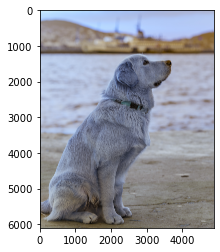

In [78]:
for i in cate :
    folders = os.path.join(path1 , i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break

In [79]:
image_size = 200

In [80]:
input_image = []
for i in cate :
    folders = os.path.join(path1 , i)
    label = cate.index(i)    # here we need to tell software that which image is of cat and which is of dog
    print('Value of label is  ' , label)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        image_array = cv2.resize(image_array , (image_size , image_size))   # resizing each image to 200*200
        input_image.append([image_array , label])  # here we are attaching the target variable.

Value of label is   0
Value of label is   1


In [82]:
len(input_image)

102

In [83]:
np.random.shuffle(input_image)

In [84]:
# till this point X and Y values are together lets seperate them.

X =   []
Y =   []

for X_values , labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [85]:
X = np.array(X)
Y = np.array(Y)

In [86]:
X.shape

(102, 200, 200, 3)

In [87]:
Y

array([1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0])

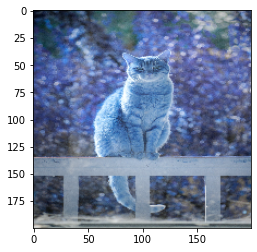

In [88]:
plt.imshow(X[73])

In [89]:
X = X / 255

In [90]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout

In [91]:
from tensorflow.keras.utils import to_categorical 

In [92]:
model = Sequential()

model.add(Conv2D(filters = 14 , kernel_size = (7,7) , activation ='relu' , padding='same'))
model.add(MaxPool2D(pool_size=(2 , 2)))
model.add(Flatten())

model.add(Dense(128 , activation='relu'))
model.add(Dense(2 , activation='softmax'))

In [93]:
model.compile(optimizer = 'adam', loss= 'sparse_categorical_crossentropy' , metrics=['accuracy'])

In [94]:
model.fit(X , Y ,epochs = 20)

Epoch 1/20
4/4 [==============================] - 4s 718ms/step - loss: 24.7908 - accuracy: 0.5000
Epoch 2/20
4/4 [==============================] - 3s 677ms/step - loss: 11.3406 - accuracy: 0.4902
Epoch 3/20
4/4 [==============================] - 3s 660ms/step - loss: 3.2114 - accuracy: 0.5294
Epoch 4/20
4/4 [==============================] - 3s 684ms/step - loss: 1.2655 - accuracy: 0.5882
Epoch 5/20
4/4 [==============================] - 3s 679ms/step - loss: 0.5731 - accuracy: 0.5882
Epoch 6/20
4/4 [==============================] - 3s 707ms/step - loss: 0.3839 - accuracy: 0.9510
Epoch 7/20
4/4 [==============================] - 3s 668ms/step - loss: 0.2885 - accuracy: 0.9020
Epoch 8/20
4/4 [==============================] - 3s 644ms/step - loss: 0.2812 - accuracy: 0.8922
Epoch 9/20
4/4 [==============================] - 3s 675ms/step - loss: 0.2788 - accuracy: 0.8922
Epoch 10/20
4/4 [==============================] - 3s 684ms/step - loss: 0.2405 - accuracy: 0.9608
Epoch 11/20
4/4 [